In [ ]:
!pip install h5py==2.10.0 --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.

In [ ]:
import string
import random
from random import randint
import cv2
import numpy as np
import os
import re
from PIL import Image, ImageFont, ImageDraw
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Run this command only once

# Downloads the license plate template to /content/blank_plate.png
!gdown --id 1Q_FsX2z6DaDCLM91qGZzwvctaW9bN60v

Downloading...
From: https://drive.google.com/uc?id=1Q_FsX2z6DaDCLM91qGZzwvctaW9bN60v
To: /content/blank_plate.png
100% 144k/144k [00:00<00:00, 53.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/gdrive')

Mounted at /content/drive
Mounted at /content/gdrive


In [ ]:
generated_plate_path = "/content/gdrive/MyDrive/ENPH 353/dec1_generated_license_plates" 

letter_counter = {
    'A': 0, 
    'B': 0,
    'C': 0,
    'D': 0,
    'E': 0,
    'F': 0,
    'G': 0,
    'H': 0,
    'I': 0,
    'J': 0,
    'K': 0,
    'L': 0,
    'M': 0,
    'N': 0,
    'O': 0,
    'P': 0,
    'Q': 0,
    'R': 0,
    'S': 0,
    'T': 0,
    'U': 0,
    'V': 0,
    'W': 0,
    'X': 0,
    'Y': 0,
    'Z': 0
}

number_counter = {
    '1': 0, 
    '2': 0, 
    '3': 0, 
    '4': 0, 
    '5': 0, 
    '6': 0, 
    '7': 0, 
    '8': 0, 
    '9': 0, 
    '0': 0
}

NUMBER_OF_PLATES = 260

letter_selection = list(string.ascii_uppercase)
number_selection = list(range(10))

for i in range(0, NUMBER_OF_PLATES):

    # Pick two random letters
    plate_alpha = ""
    for _ in range(0, 2):
        next_letter = random.choice(letter_selection)
        if letter_counter[next_letter] >= 20 - 1:
            letter_selection.remove(next_letter)
        letter_counter[next_letter] += 1
        plate_alpha += next_letter

    # Pick two random numbers
    num1 = random.choice(number_selection)
    if number_counter[str(num1)] >= 55 - 1:
        number_selection.remove(num1)
    number_counter[str(num1)] += 1
    num2 = random.choice(number_selection)
    if number_counter[str(num2)] >= 55 - 1:
        number_selection.remove(num2)
    number_counter[str(num2)] += 1
    num = int(str(num1) + str(num2))
    plate_num = "{:02d}".format(num)

    # Write plate to image
    blank_plate = cv2.imread("/content/blank_plate.png")

    # Convert into a PIL image (this is so we can use the monospaced fonts)
    blank_plate_pil = Image.fromarray(blank_plate)

    # Get a drawing context
    draw = ImageDraw.Draw(blank_plate_pil)
    monospace = ImageFont.truetype(font="/content/gdrive/MyDrive/ENPH 353/UbuntuMono-R.ttf", 
                                   size=200)
    draw.text(xy=(48, 60),
              text=plate_alpha + " " + plate_num, 
              fill=(255,0,0), font=monospace)

    # Convert back to OpenCV image and save
    blank_plate = np.array(blank_plate_pil)

    # Write license plate to file
    cv2.imwrite(os.path.join(generated_plate_path + "/", 
                             "{}{}.png".format(plate_alpha, plate_num)),
                             blank_plate)

print(letter_counter)
print(number_counter)

In [ ]:
# supplementing dataset with characters that the model has trouble with
generated_plate_path = "/content/gdrive/MyDrive/ENPH 353/dec1_generated_license_plates" 

letter_counter = {
    'A': 0, 
    'B': 0,
    'C': 0,
    'D': 0,
    'E': 0,
    'F': 0,
    'G': 0,
    'H': 0,
    'I': 0,
    'J': 0,
    'K': 0,
    'L': 0,
    'M': 0,
    'N': 0,
    'O': 0,
    'P': 0,
    'Q': 0,
    'R': 0,
    'S': 0,
    'T': 0,
    'U': 0,
    'V': 0,
    'W': 0,
    'X': 0,
    'Y': 0,
    'Z': 0
}

number_counter = {
    '1': 0, 
    '2': 0, 
    '3': 0, 
    '4': 0, 
    '5': 0, 
    '6': 0, 
    '7': 0, 
    '8': 0, 
    '9': 0, 
    '0': 0
}

NUMBER_OF_PLATES = 2

# letter_selection = ['K', 'D', 'O']
# number_selection = [2, 5, 4, 6, 1, 0, 7]

letter_selection = ['E', 'Q']
number_selection = [2, 5, 4, 6, 1, 0, 7]

for i in range(0, NUMBER_OF_PLATES):

    # Pick two random letters
    plate_alpha = ""
    for _ in range(0, 2):
        next_letter = random.choice(letter_selection)
        if letter_counter[next_letter] >= 2 - 1:
            letter_selection.remove(next_letter)
        letter_counter[next_letter] += 1
        plate_alpha += next_letter

    # Pick two random numbers
    num1 = random.choice(number_selection)
    if number_counter[str(num1)] >= 1 - 1:
        number_selection.remove(num1)
    number_counter[str(num1)] += 1
    num2 = random.choice(number_selection)
    if number_counter[str(num2)] >= 1 - 1:
        number_selection.remove(num2)
    number_counter[str(num2)] += 1
    num = int(str(num1) + str(num2))
    plate_num = "{:02d}".format(num)

    # Write plate to image
    blank_plate = cv2.imread("/content/blank_plate.png")

    # Convert into a PIL image (this is so we can use the monospaced fonts)
    blank_plate_pil = Image.fromarray(blank_plate)

    # Get a drawing context
    draw = ImageDraw.Draw(blank_plate_pil)
    monospace = ImageFont.truetype(font="/content/gdrive/MyDrive/ENPH 353/UbuntuMono-R.ttf", 
                                   size=200)
    draw.text(xy=(48, 60),
              text=plate_alpha + " " + plate_num, 
              fill=(255,0,0), font=monospace)

    # Convert back to OpenCV image and save
    blank_plate = np.array(blank_plate_pil)

    # Write license plate to file
    cv2.imwrite(os.path.join(generated_plate_path + "/", 
                             "{}{}.png".format(plate_alpha, plate_num)),
                             blank_plate)

# Data Preprocessing

In [ ]:
def files_in_folder(folder_path):
  '''
  Returns a list of strings where each entry is a file in the folder_path.
  
  Parameters
  ----------
  
  folder_path : str
     A string to folder for which the file listing is returned.
     
  '''
  files_A = !ls "{folder_path}"
  # The files when listed from Google Drive have a particular format. They are
  # grouped in sets of 4 and have spaces and tabs as delimiters.
  
  # Split the string listing sets of 4 files by tab and space and remove any 
  # empty splits.
  files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]
  
  # Concatenate all splits into a single sorted list
  files_C = []
  for element in files_B:
    files_C = files_C + element
  files_C.sort()
  
  return files_C

In [ ]:
plate_path = "/content/gdrive/MyDrive/ENPH 353/dec1_generated_license_plates" 
files = files_in_folder(plate_path)

In [ ]:
encoding = {}

alphanum = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
for i in range(36):
    encoding[alphanum[i]] = i

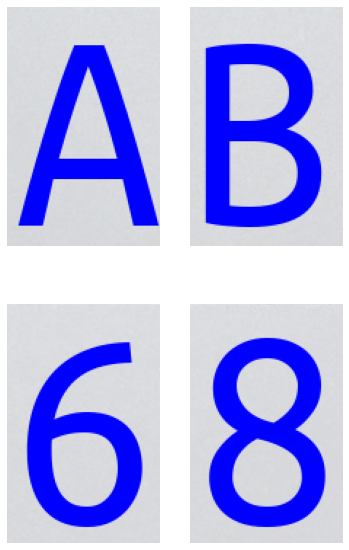

In [ ]:
pos = [(42, 75, 147, 240), 
       (148, 75, 253, 240),
       (345, 75, 450, 240),
       (445, 75, 550, 240)]

im = Image.open(plate_path + '/' + files[0])
ims = []

for i in range(4):
    crop_im = im.crop(pos[i])
    ims.append(crop_im)

plt.figure(figsize=(6, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(ims[i])
  plt.axis("off")

In [ ]:
import random

def gaussian_blur(input_img):
    ksize = random.randrange(19, 27, 2) # (start, stop, step), stop noninclusive
    return cv2.GaussianBlur(input_img, (ksize, ksize), 0)

# cropping positions (left, top, right, bottom)
pos = [(42, 75, 147, 240), 
       (148, 75, 253, 240),
       (345, 75, 450, 240),
       (445, 75, 550, 240)]

labels = []
dataset = []

for image in files:
    im = cv2.imread(plate_path + '/' + image)

    im = gaussian_blur(im)

    license = image.split(".")[0]
    list(license)

    for i in range(4):
        crop_im = im[pos[i][1]:pos[i][3], pos[i][0]:pos[i][2]]
        label = encoding[license[i]]

        dataset.append([crop_im, label])

dataset = np.array(dataset)

In [ ]:
labels = list(encoding.keys())

In [ ]:
# Shuffle the dataset
np.random.shuffle(dataset)

In [ ]:
X_dataset_orig = np.array([data[0] for data in dataset[:]])
Y_dataset_orig = np.array([[data[1]] for data in dataset]).T

In [ ]:
NUMBER_OF_LABELS = len(labels)
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
  
# Normalize X (images) dataset
X_dataset = X_dataset_orig/255.

# Convert Y dataset to one-hot encoding
Y_dataset = convert_to_one_hot(Y_dataset_orig, NUMBER_OF_LABELS).T

In [ ]:
X_dataset.shape

(1116, 165, 105, 3)

In [ ]:
Y_dataset.shape

(1116, 36)

In [ ]:
train_data_X = X_dataset[0:900]
train_data_Y = Y_dataset[0:900]

val_data_X = X_dataset[900:]
val_data_Y = Y_dataset[900:]

print("Total examples: {:d}\nTraining examples: {:d}\nTest examples: {:d}".
      format(train_data_X.shape[0] + val_data_X.shape[0],
             math.ceil(train_data_X.shape[0]),
             math.floor(val_data_X.shape[0])))
print("Train X shape: " + str(train_data_X.shape))
print("Train Y shape: " + str(train_data_Y.shape))

Total examples: 1116
Training examples: 900
Test examples: 216
Train X shape: (900, 165, 105, 3)
Train Y shape: (900, 36)


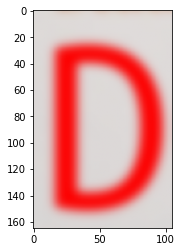

In [ ]:
plt.imshow(train_data_X[0])

#Training the Model

In [ ]:
# Use tensorflow 1.x so it's compatible with ROS Melodic
%tensorflow_version 1.14.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
 
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend

In [ ]:
input_shape = (train_data_X[0].shape)

conv_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5), 
    layers.Dense(512, activation='relu'),
    layers.Dense(NUMBER_OF_LABELS, activation='softmax')
])

LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 163, 103, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 81, 51, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 79, 49, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 24, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 59904)             0         
_________________________________________________________________
dropout (Dropout)            (None, 59904)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               3

In [ ]:
history_conv = conv_model.fit(train_data_X, train_data_Y,
                              validation_data=(val_data_X, val_data_Y),
                              epochs=16,
                              batch_size=16,
                              callbacks=[
                                    tf.keras.callbacks.EarlyStopping(
                                        monitor='val_loss',
                                        patience=2,
                                        restore_best_weights=True)
                              ]
)

Train on 900 samples, validate on 216 samples
Epoch 1/16
900/900 [==============================] - 42s 47ms/sample - loss: 2.1133 - acc: 0.4922 - val_loss: 0.6981 - val_acc: 0.7963
Epoch 2/16
900/900 [==============================] - 41s 45ms/sample - loss: 0.3511 - acc: 0.9200 - val_loss: 0.1374 - val_acc: 0.9398
Epoch 3/16
900/900 [==============================] - 42s 47ms/sample - loss: 0.1236 - acc: 0.9678 - val_loss: 0.1956 - val_acc: 0.9491
Epoch 4/16
900/900 [==============================] - 41s 46ms/sample - loss: 0.1081 - acc: 0.9733 - val_loss: 0.1186 - val_acc: 0.9491
Epoch 5/16
900/900 [==============================] - 41s 45ms/sample - loss: 0.0690 - acc: 0.9789 - val_loss: 0.0133 - val_acc: 1.0000
Epoch 6/16
900/900 [==============================] - 40s 44ms/sample - loss: 0.0378 - acc: 0.9889 - val_loss: 0.0713 - val_acc: 0.9491
Epoch 7/16
900/900 [==============================] - 40s 45ms/sample - loss: 0.0291 - acc: 0.9911 - val_loss: 0.0471 - val_acc: 0.9491


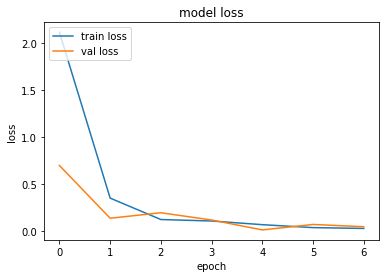

In [ ]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

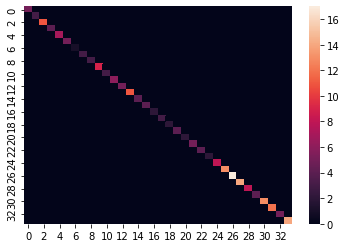

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_labels = conv_model.predict_classes(val_data_X)
true_labels = np.argmax(val_data_Y, axis=1)

matrix = confusion_matrix(true_labels, pred_labels)
plt = sns.heatmap(matrix)

In [ ]:
conv_model.save('thoughtsandprayers.h5')

# Using the model


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
loaded_model = tf.keras.models.load_model('model.h5')

# OpenCV version

(1131, 600, 3)


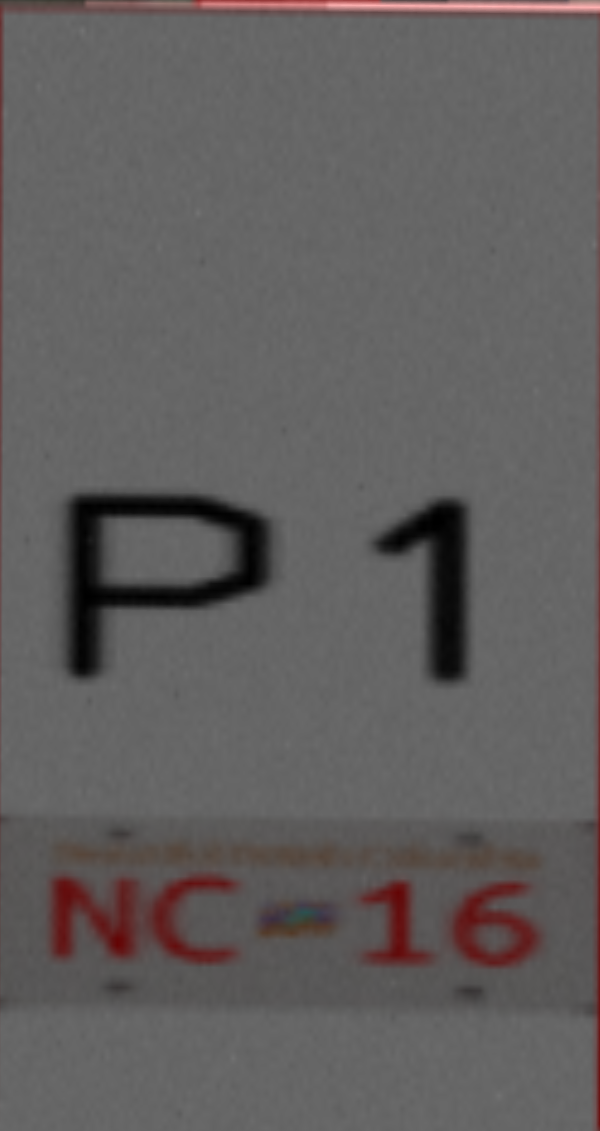

In [ ]:
# cropped real sim image
filepath = "/content/cropped_P1.png"
result = cv2.imread(filepath)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
print(result.shape)
cv2_imshow(result)

(1131, 600)
813
1014
(1131,)
(201, 600, 3)


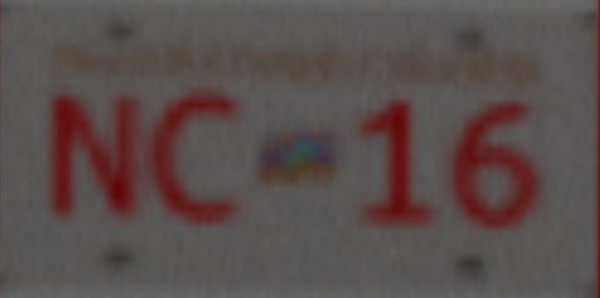

In [ ]:
# crop image to only license plate
# convert image to grayscale
im_gray = cv2.cvtColor(np.float32(result), cv2.COLOR_RGB2GRAY)

# crop to only license plate by summing columns and finding colour changes
im_arr = np.array(im_gray)
sum = np.sum(im_arr[:,:50], axis=1)

colour_threshold = 50

col_idx = [] 

for i in range(1, len(sum)):
    current_row = sum[i]
    prev_row = sum[i-1]

    if np.abs(current_row - prev_row) > colour_threshold:
        col_idx.append(i)

# filter out values within 100 pixels of the top and bottom of the image
filter_threshold = 100
col_idx = np.array(col_idx)
col_idx = col_idx[np.where(col_idx > filter_threshold)]
col_idx = col_idx[np.where(col_idx < (len(sum)-filter_threshold))]

top = col_idx[0] 
bottom = col_idx[-1] 

print(top)
print(bottom)
print(sum.shape)

crop_im = result[top:bottom, 0:600, :]
print(crop_im.shape)

# resize image to 600 x 298
resize_img = cv2.resize(crop_im, dsize=(600,298), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resize_img)

In [ ]:
encoding = {}

alphanum = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
for i in range(36):
    encoding[alphanum[i]] = i

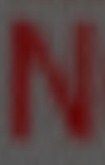

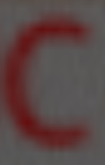

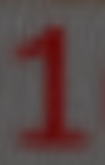

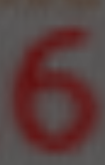

NC16


In [ ]:
pos = [(42, 75, 147, 240), 
       (148, 75, 253, 240),
       (345, 75, 450, 240),
       (440, 75, 545, 240)]

# creating a new mapping with the keys and values reversed from the original mapping
# https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping 
unencoding = dict(zip(encoding.values(), encoding.keys()))

def preprocess_input(test_image):
    predicted_license_plate = ""

    im = test_image

    for i in range(4):
        crop_im = im[pos[i][1]:pos[i][3], pos[i][0]:pos[i][2], :]
        cv2_imshow(crop_im)

        normalized_im = np.array([crop_im/255.])

        prediction = loaded_model.predict(normalized_im) # array of probabilities

        # array of the locations of probabilities sorted from highest to lowest
        # note: the location is the predicted label
        # https://stackoverflow.com/questions/27473601/next-argmax-values-in-python/27473888
        ordered_prediction = np.argsort(-prediction, axis=1) 
        if i < 2:
            for index in ordered_prediction[0]:
                if index <= 25:
                    predicted_label = index
                    break
        else:
            for index in ordered_prediction[0]:
                if index > 25:
                    predicted_label = index
                    break

        unencoded_label = unencoding[predicted_label]
        predicted_license_plate += unencoded_label

    return predicted_license_plate

print(preprocess_input(resize_img))

# PIL version

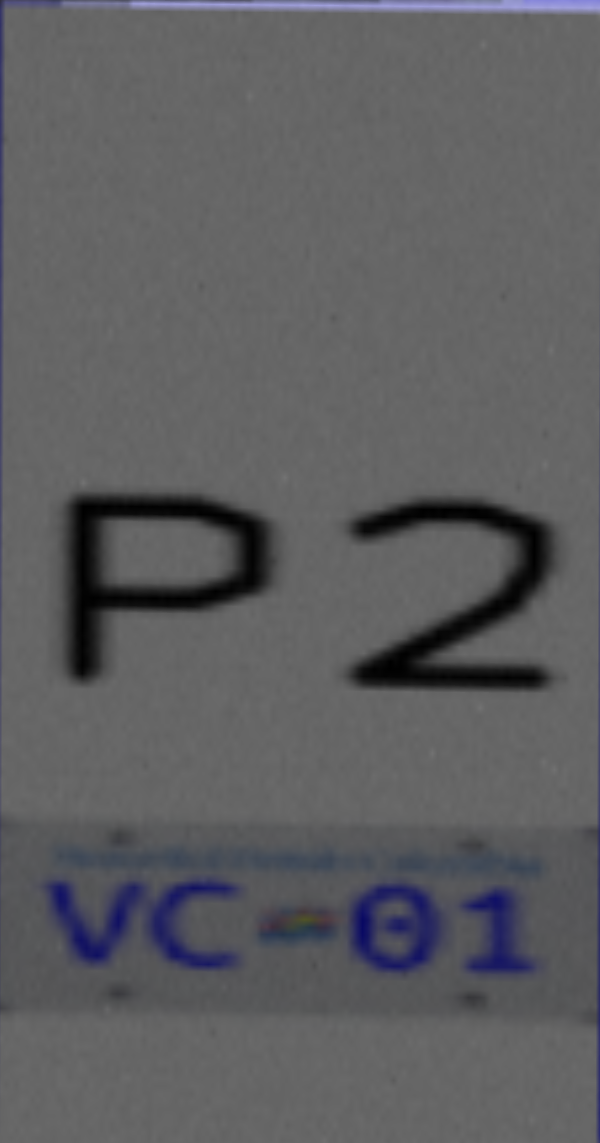

In [ ]:
from PIL import Image
filepath = "/content/cropped_P2.png"
im = Image.open(filepath)
width, height = im.size
im

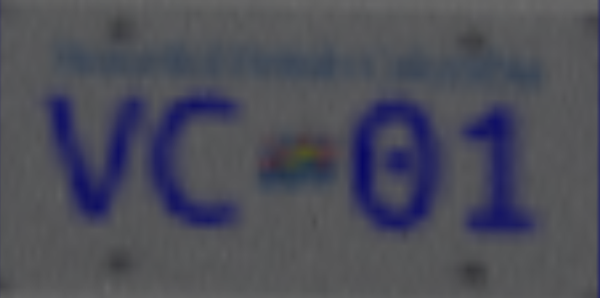

In [ ]:
# crop image to only license plate
# convert image to grayscale
im_gray = cv2.cvtColor(np.float32(im), cv2.COLOR_BGR2GRAY)

# crop to only license plate by summing columns and finding colour changes
im_arr = np.array(im_gray)
sum = np.sum(im_arr[:,:50], axis=1)

colour_threshold = 50

col_idx = [] 

for i in range(1, len(sum)):
    current_row = sum[i]
    prev_row = sum[i-1]
    if np.abs(current_row - prev_row) > colour_threshold:
        col_idx.append(i)

# filter out values within 100 pixels of the top and bottom of the image
filter_threshold = 100
col_idx = np.array(col_idx)
col_idx = col_idx[np.where(col_idx > filter_threshold)]
col_idx = col_idx[np.where(col_idx < (len(sum)-filter_threshold))]

top = col_idx[0] 
bottom = col_idx[-1] 

# (left, top, right, bottom)
pos = (0, top, 600, bottom)
crop_im = im.crop(pos)

# resize image to 600 x 298
resize_img = crop_im.resize((600,298))
resize_img

VC01


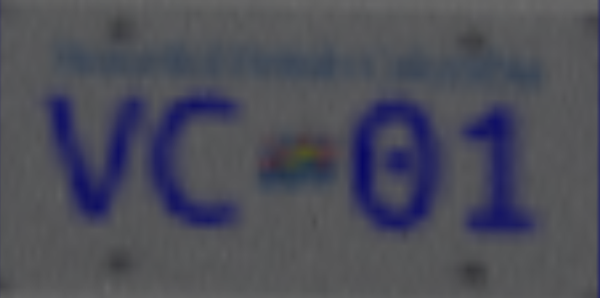

In [ ]:
pos = [(48, 75, 153, 240), 
       (153, 75, 258, 240),
       (345, 75, 450, 240),
       (450, 75, 555, 240)]

# creating a new mapping with the keys and values reversed from the original mapping
# https://stackoverflow.com/questions/483666/reverse-invert-a-dictionary-mapping 
unencoding = dict(zip(encoding.values(), encoding.keys()))

def preprocess_input(test_image):
    predicted_license_plate = ""

    im = test_image

    for i in range(4):
        crop_im = np.array(im.crop(pos[i]))
        normalized_im = np.array([crop_im/255.])

        prediction = loaded_model.predict(normalized_im) # array of probabilities

        # array of the locations of probabilities sorted from highest to lowest
        # note: the location is the predicted label
        # https://stackoverflow.com/questions/27473601/next-argmax-values-in-python/27473888
        ordered_prediction = np.argsort(-prediction, axis=1) 
        if i < 2:
            for index in ordered_prediction[0]:
                if index <= 25:
                    predicted_label = index
                    break
        else:
            for index in ordered_prediction[0]:
                if index > 25:
                    predicted_label = index
                    break

        unencoded_label = unencoding[predicted_label]
        predicted_license_plate += unencoded_label

    return predicted_license_plate

print(preprocess_input(resize_img))
resize_img